In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud, STOPWORDS

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode()
from plotly.subplots import make_subplots

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\blaze\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import glob
data_path = glob.glob("C:\\Python\\Data analysis\\Pfizer Vaccine Tweets VADER Sentiment Analysis+EDA\\*.csv")

print(data_path)

['C:\\Python\\Data analysis\\Pfizer Vaccine Tweets VADER Sentiment Analysis+EDA\\vaccination_tweets.csv']


In [3]:
data=pd.read_csv(data_path[0])

data.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

TEXT PREPROCESSING FOR VADER SENTIMENT ANALYSIS

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIIA
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    return text

data["text"]=data["text"].apply(lambda x: clean(x))

analyser = SIIA()
scores=[]
for i in range(len(data["text"])):
    score = analyser.polarity_scores(data["text"][i])
    score = score["compound"]
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append("Positive")
    if i <= -0.05:
        sentiment.append("Negative")
    else:
        sentiment.append("Neutral")

data["sentiment"]=pd.Series(np.array(sentiment))

In [5]:
data.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet sentiment  
0         0          0       False  Positive  
1         1          1       False   Neutral  
2         0          0       False  Negative  
3       446       2129       False  Positive  
4         0          0       False   Neutral

WORDCLOUD ANALYSIS OF TWEET TEXT

(-0.5, 399.5, 199.5, -0.5)

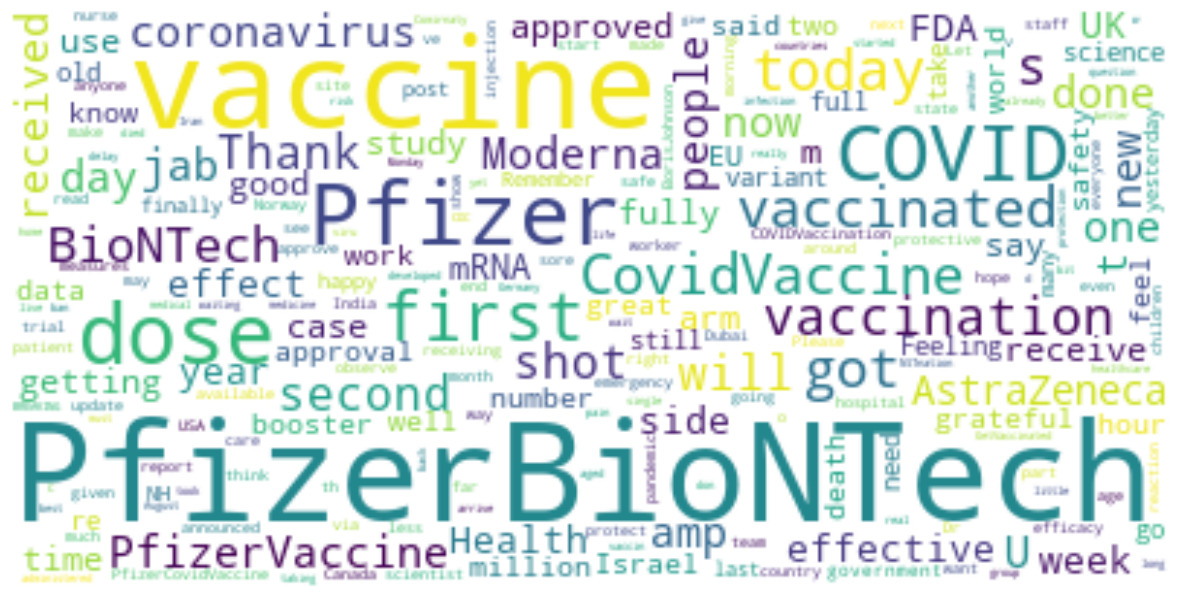

In [6]:
tweet_ALL = " ".join(review for review in data.text)



wordcl = WordCloud(background_color='white', max_font_size = 50, max_words = 5000, collocations = False).generate(tweet_ALL)
plt.figure(figsize=(15, 15))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')

REMOVING PUNCTUATIONS AND MAKING TEXT LOWERCASE

In [7]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text
data['text'] = data['text'].apply(lambda x:clean_text(x))

In [8]:
data["text"]

0        same folks said daikon paste could treat a cyt...
1        while the world has been on the wrong side of ...
2        coronavirus sputnikv astrazeneca pfizerbiontec...
3        facts are immutable senator even when youre no...
4        explain to me again why we need a vaccine bori...
                               ...                        
11015    the number of covid cases today  november  rem...
11016                          first dose ✅ pfizerbiontech
11017    the number of covid cases today  november  rem...
11018    pfizerbiontech has developed new pill paxlovid...
11019    the number of covid cases today  november  rem...
Name: text, Length: 11020, dtype: object

STEMMING AND LEMMATIZATION

df shows the text at each step of the preprocessing\
From the dataframe df we can decide which one of the stemming(Porter or Snowball)/lemmatization or both is suitable for our data.

In [9]:
df=pd.DataFrame()
df['text']=data['text']

def tokenization(text):
    text=re.split("\W+", text)
    return text

df["tokenized"] = df["text"].apply(lambda x: tokenization(x.lower()))

stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df["No_stopwords"] = df["tokenized"].apply(lambda x: remove_stopwords(x))

ps=nltk.PorterStemmer()

def stemming1(text):

    text = [ps.stem(word) for word in text]
    return text

df['stemmed_porter'] = df["No_stopwords"].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text

df["stemmed_snowball"] = df['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

In [10]:
df.head()

text  \
0  same folks said daikon paste could treat a cyt...   
1  while the world has been on the wrong side of ...   
2  coronavirus sputnikv astrazeneca pfizerbiontec...   
3  facts are immutable senator even when youre no...   
4  explain to me again why we need a vaccine bori...   

                                           tokenized  \
0  [same, folks, said, daikon, paste, could, trea...   
1  [while, the, world, has, been, on, the, wrong,...   
2  [coronavirus, sputnikv, astrazeneca, pfizerbio...   
3  [facts, are, immutable, senator, even, when, y...   
4  [explain, to, me, again, why, we, need, a, vac...   

                                        No_stopwords  \
0  [folks, said, daikon, paste, could, treat, cyt...   
1  [world, wrong, side, history, year, hopefully,...   
2  [coronavirus, sputnikv, astrazeneca, pfizerbio...   
3  [facts, immutable, senator, even, youre, ethic...   
4  [explain, need, vaccine, borisjohnson, matthan...   

                                      stemmed_porter  \
0  [folk, said, daikon, past, could, treat, cytok...   
1  [world, wrong, side, histori, year, hope, bigg...   
2  [coronaviru, sputnikv, astrazeneca, pfizerbion...   
3  [fact, immut, senat, even, your, ethic, sturdi...   
4  [explain, need, vaccin, borisjohnson, matthanc...   

                                    stemmed_snowball  \
0  [folk, said, daikon, past, could, treat, cytok...   
1  [world, wrong, side, histori, year, hope, bigg...   
2  [coronavirus, sputnikv, astrazeneca, pfizerbio...   
3  [fact, immut, senat, even, your, ethic, sturdi...   
4  [explain, need, vaccin, borisjohnson, matthanc...   

                                          lemmatized  
0  [folk, said, daikon, paste, could, treat, cyto...  
1  [world, wrong, side, history, year, hopefully,...  
2  [coronavirus, sputnikv, astrazeneca, pfizerbio...  
3  [fact, immutable, senator, even, youre, ethica...  
4  [explain, need, vaccine, borisjohnson, matthan...

IT LOOKS LIKE BOTH THE STEMMING METHODS ARE REDUCING THE TEXT WORDS TO UNUSUAL STEMS WHILE LEMMATIZATION SEEMS TO WORK FINE

In [11]:
data['text']=df['lemmatized']
data.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  [folk, said, daikon, paste, could, treat, cyto...   
1  2020-12-13 16:27:13  [world, wrong, side, history, year, hopefully,...   
2  2020-12-12 20:33:45  [coronavirus, sputnikv, astrazeneca, pfizerbio...   
3  2020-12-12 20:23:59  [fact, immutable, senator, even, youre, ethica...   
4  2020-12-12 20:17:19  [explain, need, vaccine, borisjohnson, matthan...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet sentiment  
0         0          0       False  Positive  
1         1          1       False   Neutral  
2         0          0       False  Negative  
3       446       2129       False  Positive  
4         0          0       False   Neutral

SENTIMENT COUNTS

In [12]:
temp = data.groupby("sentiment").count()["text"].reset_index().sort_values(by="text", ascending=False)

temp.style.background_gradient(cmap='Purples')

FUNNEL CHART FOR BETTER VISUALIZATION OF SENTIMENT DISTRIBUTION

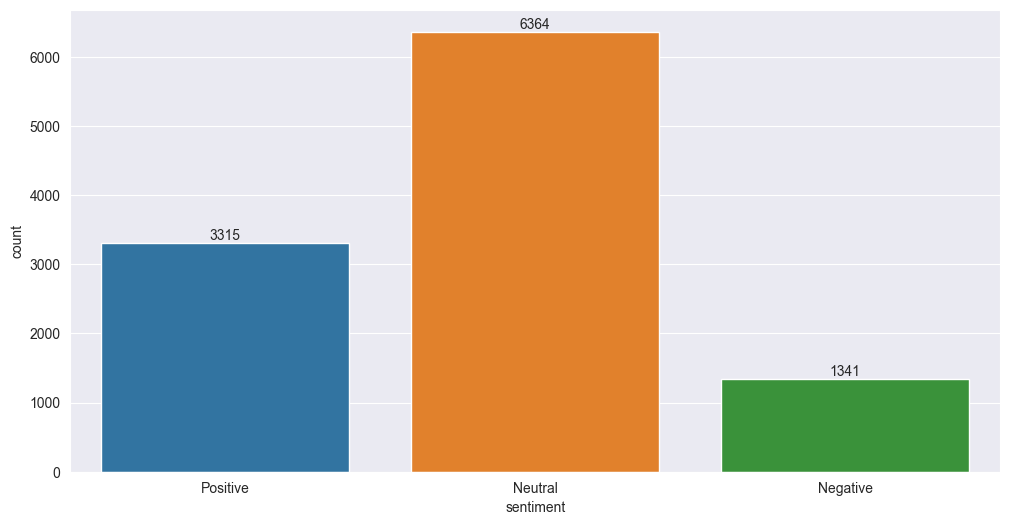

In [13]:
plt.figure(figsize=(12,6))
ax0=sns.countplot(x='sentiment',data=data)
ax0.bar_label(ax0.containers[0])
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

ACCOUNT:VERIFIED/NON-VERIFIED

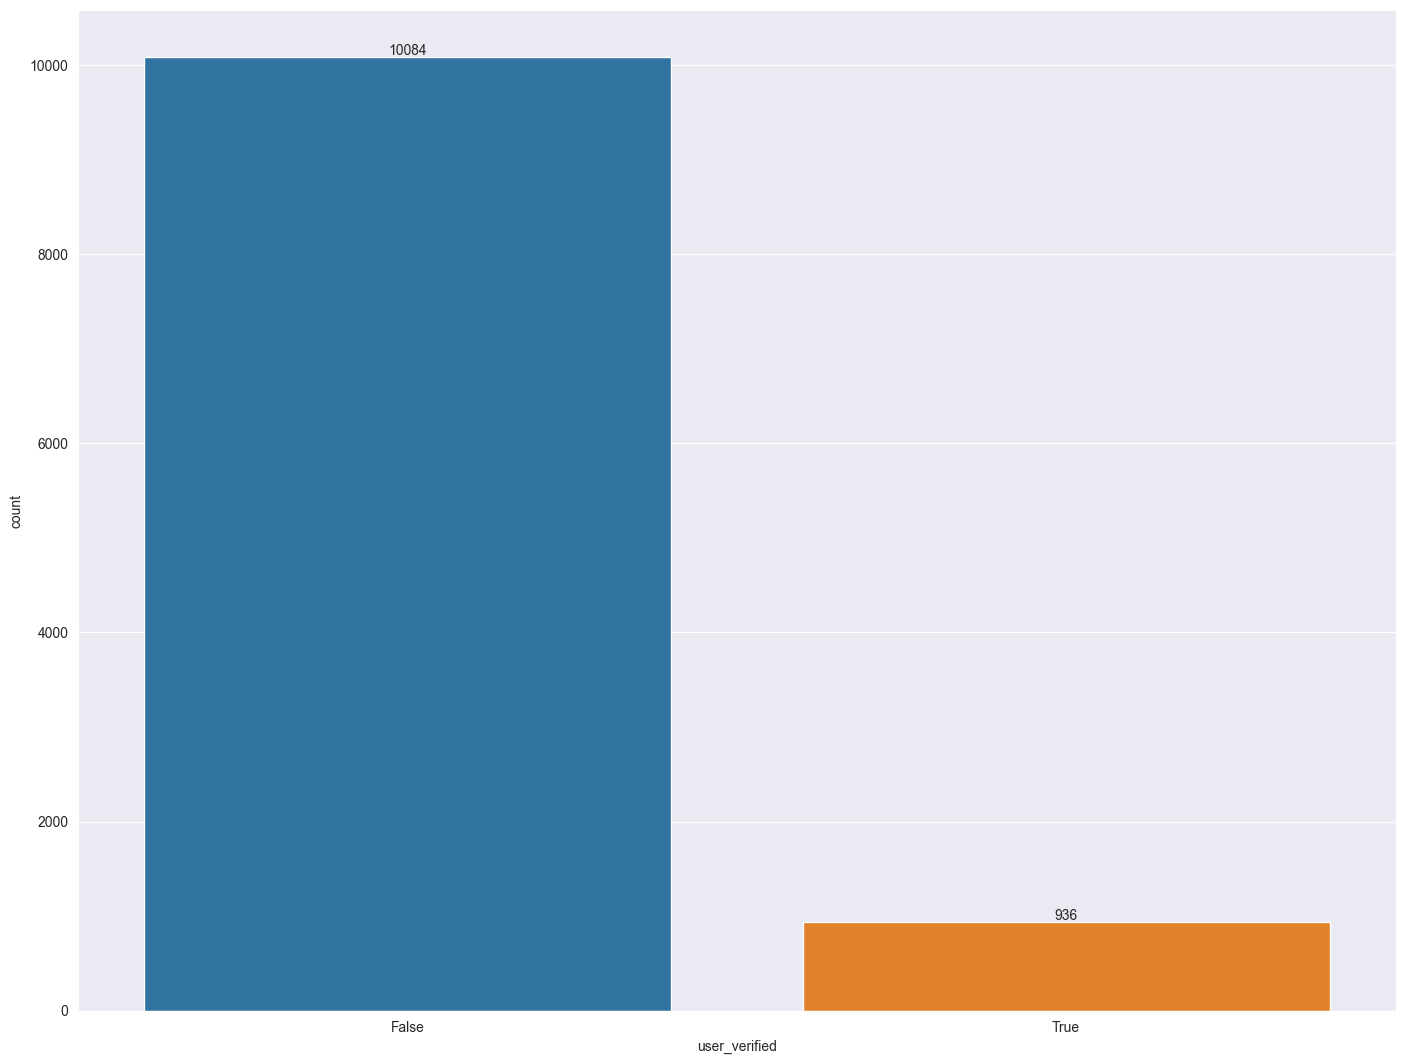

In [14]:
ax1 = sns.countplot(data= data, x="user_verified")
ax1.bar_label(ax1.containers[0])

plt.show()

DISTRIBUTION OF THE FAVORITES RECIEVED BASED ON TWEET SENTIMENT AND WHETHER THE ACCOUNT IS VERIFIED/NOT

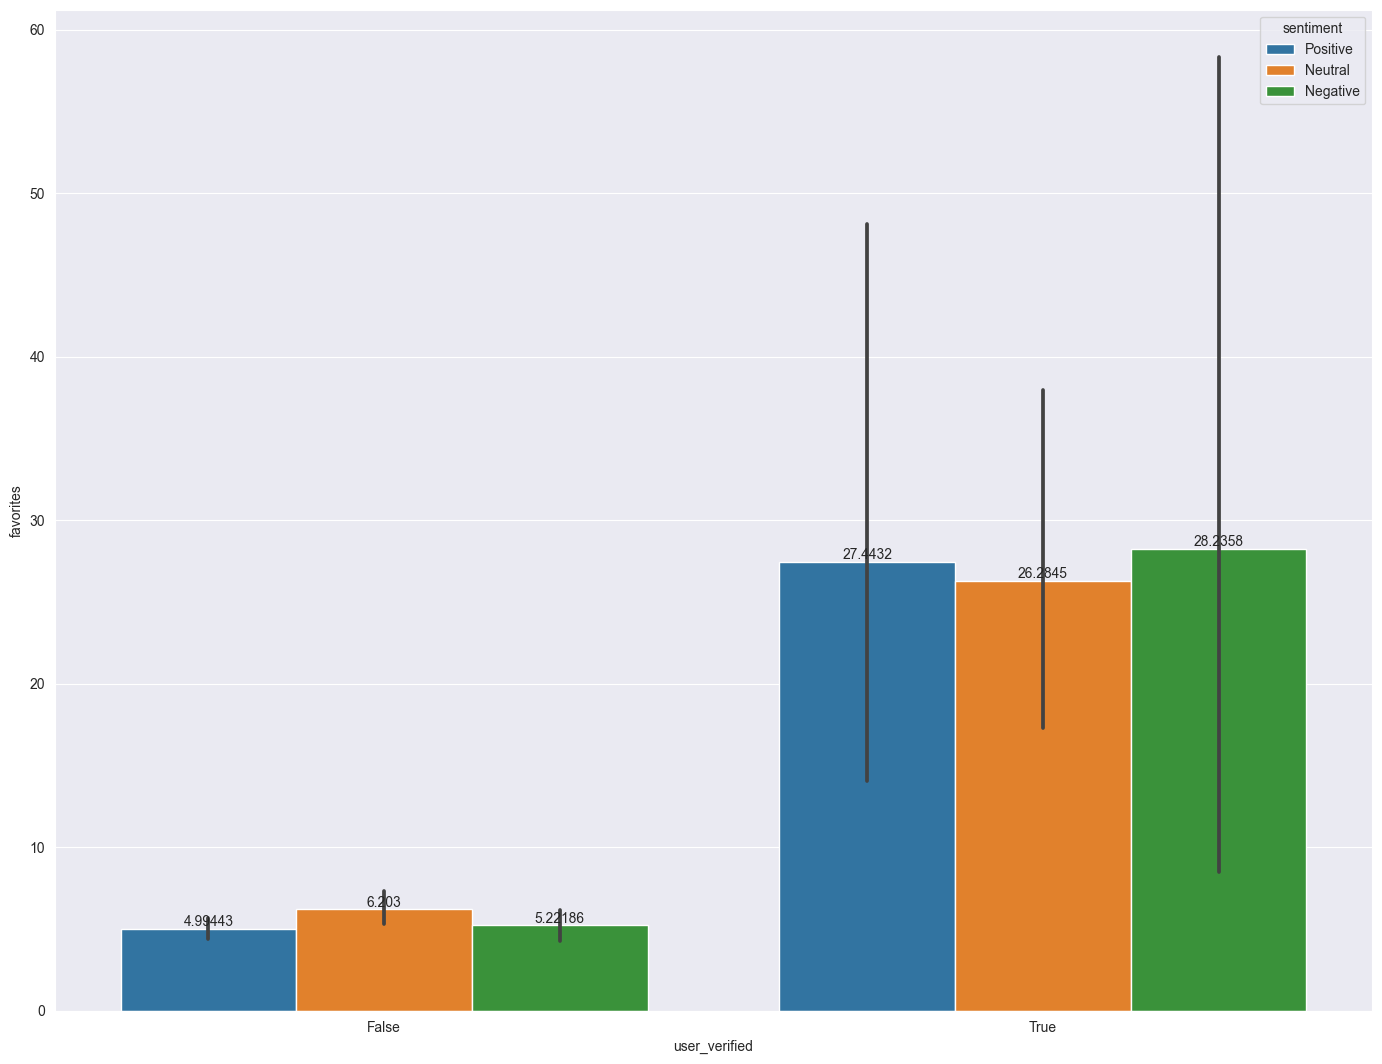

In [15]:
ax3 = sns.barplot(x="user_verified", y="favorites", hue="sentiment", data=data)

for container in ax3.containers:
    ax3.bar_label(container)

DISTRIBUTION OF THE RETWEETS BASED ON TWEET SENTIMENT AND WHETHER THE ACCOUNT IS VERIFIED/NOT

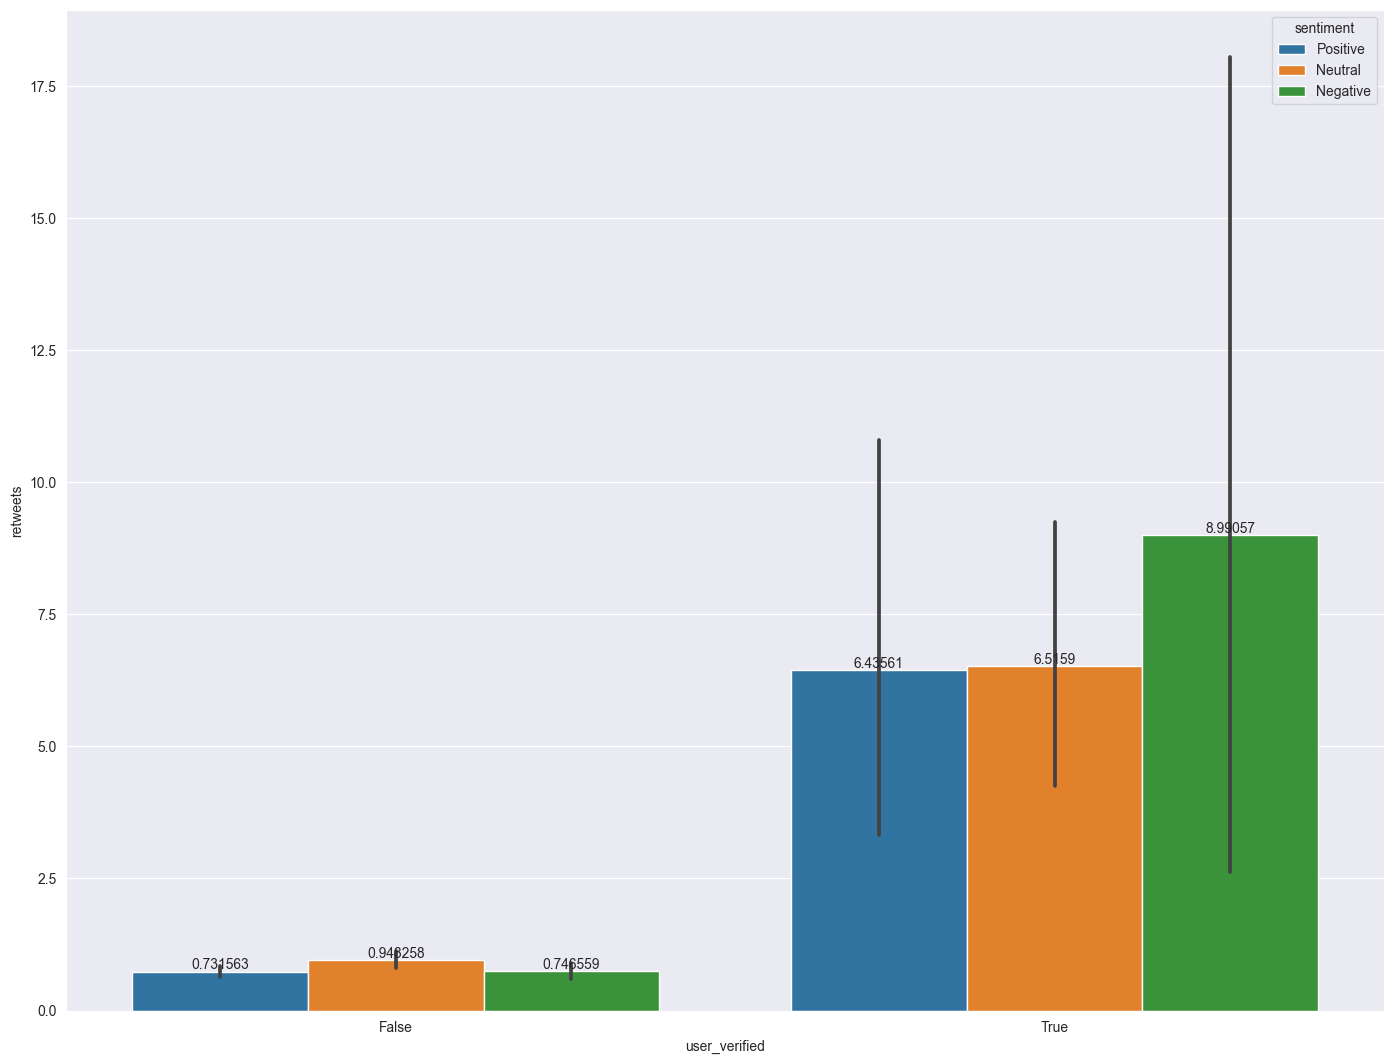

In [16]:
ax4 = sns.barplot(x="user_verified", y="retweets", data=data, hue="sentiment")

for container in ax4.containers:
    ax4.bar_label(container)

THE TOP 30 MOST FREQUENTLY OCCURING WORDS IN THE TWEET TEXT DATA

In [17]:
all_words=[]

for i in range(len(data["text"])):
    a=data["text"][i]
    for l in a:
        all_words.append(l)

all_words = pd.Series(np.array(all_words))

common_words = all_words.value_counts()[:30].rename_axis('Common Words').reset_index(name='count')

fig = px.treemap(common_words, path=["Common Words"], values="count", title='30 Most Common Words In Tweets')

fig.show()

THE TOP 30 MOST FREQUENTLY USED HASHTAGS IN THE TWEET TEXT DATA

In [18]:
data["hashtags"] = data["hashtags"].fillna("[]")
all_hashtags=[]

for i in range(len(data["hashtags"])):
    a=data["hashtags"][i].strip("[]").split(", ")
    for l in a:
        all_hashtags.append(l)

all_hashtags=['No Hashtag' if x=='' else x for x in all_hashtags]

all_hashtags=pd.Series(np.array(all_hashtags))
print('There are {} instances of tweets in which No Hashtags were used'.format(all_hashtags.value_counts()[1]))

common_hashtags=all_hashtags.value_counts().drop(labels='No Hashtag')[:30].rename_axis('Common Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Hashtags'], values='count',title='30 Most Common Hashtags', width=1000, height=800)
fig.show()

There are 2582 instances of tweets in which No Hashtags were used


In [19]:
Positive_tweet = data[data["sentiment"] == "Positive"].reset_index()
Negative_tweet = data[data['sentiment']=='Negative'].reset_index()
Neutral_tweet = data[data['sentiment']=='Neutral'].reset_index()

In [20]:
all_positive_words=[]
all_positive_hashtags=[]

for i in range(len(Positive_tweet["text"])):
    a=Positive_tweet["text"][i]
    b=Positive_tweet["hashtags"][i].strip("[]").split(", ")

    for l in a:
        all_positive_words.append(l)
    for l in b:
        all_positive_hashtags.append(l)

all_positive_words = pd.Series(np.array(all_positive_words))
all_positive_hashtags = pd.Series(np.array(all_positive_hashtags))

common_words=all_positive_words.value_counts().drop(labels='')[:70].rename_axis('Common Positive Words').reset_index(name='count')

fig2 = px.treemap(common_words, path=["Common Positive Words"], values="count", title='70 Most Common Words In Positive Tweets', width=1200, height=800)
fig2.show()

common_hashtags=all_positive_hashtags.value_counts()[:70].drop(labels='').rename_axis('Common Positive Hashtags').reset_index(name='count')

fig3=px.treemap(common_hashtags, path=["Common Positive Hashtags"], values="count", title = "70 Most Common Hashtags In Positive Tweets", width=1200, height=800)
fig3.show()


NEGATIVE TWEETS

In [21]:
all_negative_words=[]
all_negative_hashtags=[]
for i in range(len(Negative_tweet['text'])):
    a=Negative_tweet['text'][i]
    b=Negative_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_negative_words.append(i)
    for i in b:
        all_negative_hashtags.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))
all_negative_hashtags=pd.Series(np.array(all_negative_hashtags))
common_words=all_negative_words.value_counts().drop(labels='')[:70].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='70 Most Common Words In Negative Tweets', width=1200, height=800)
fig.show()
common_hashtags=all_negative_hashtags.value_counts()[:70].drop(labels='').rename_axis('Common Negative Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Negative Hashtags'], values='count',title='70 Most Common Hashtags In Negative Tweets', width=1200, height=800)
fig.show()

SOURCE DISTRIBUTION OF TWEETS

In [22]:
data_ = data['source'].value_counts().reset_index()
top25_source=[]

for i in range(len(data_)):
    source = data_["index"][i]
    top25_source.append(source)

top25_source = top25_source[:25]
top25_source

['Twitter for iPhone',
 'Twitter Web App',
 'Twitter for Android',
 'TweetDeck',
 'Twitter for iPad',
 'Instagram',
 'Buffer',
 'Hootsuite Inc.',
 'IFTTT',
 'Blog2Social APP',
 'LinkedIn',
 'Microsoft Power Platform',
 'Tweetbot for iΟS',
 'Revive Social App',
 'Nonli',
 'dlvr.it',
 'WordPress.com',
 'Paper.li',
 'Twitter for Mac',
 'ETRetail.com',
 'SocialFlow',
 'Sprinklr Publishing',
 'Sendible',
 '24liveblog',
 'Sprout Social']

In [25]:
data_ = data['source'].value_counts().reset_index()

trace1 = go.Bar(
                x = ['Twitter for Android', 'Twitter Web App', 'Twitter for iPhone',
       'TweetDeck', 'Buffer', 'Twitter for iPad', 'Twitter Media Studio',
       'ThreadReaderApp', 'Instagram', 'SocialFlow', 'Hootsuite Inc.',
       'LinkedIn', 'Twitter for Mac', '24liveblog', 'Publer ', 'IFTTT',
       'Socialbakers', 'Falcon Social Media Management ', 'Echobox',
       'Microsoft Power Platform', 'Nonli', 'Sendible',
       'Tweetbot for Mac', 'EastMojo',
       'Twitter Media Studio - LiveCut'], #temp_df['index'],
                y = data_['source'],
                marker = dict(color = 'rgb(250,13,92)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=data_['source'], textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'SOURCE DISTRIBUTION OF TWEETS' , xaxis = dict(title = 'SOURCE'), yaxis = dict(title = 'Count'), height=650)
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

GLIMPSE AT VERIFIED ACCOUNTS

SOURCE DISTRIBUTION

In [27]:
data_verified = data[data["user_verified"] == True].reset_index()
data_not_verified=data[(data['user_verified']==False)].reset_index()

In [28]:
data_ = data_verified["source"].value_counts().reset_index()

trace2 = go.Bar(x = ['Twitter Web App', 'Twitter for iPhone', 'TweetDeck', 'Buffer',
       'SocialFlow', 'Hootsuite Inc.', 'Twitter for iPad',
       'Twitter for Android', 'Socialbakers', 'Echobox',
       'Twitter Media Studio', 'EastMojo',
       'Twitter Media Studio - LiveCut', 'GT_Backend'], y=data_["source"], marker = dict(color = 'rgb(250,13,92)', line=dict(color='rgb(0,0,0)',width=1.5)), text=data_['source'], textposition='outside')

layout = go.Layout(template="plotly_dark", title='SOURCE DISTRIBUTION OF TWEETS FROM VERIFIED ACCOUNTS', xaxis=dict(title = 'SOURCE'), yaxis=dict(title = 'Count'), height=650)

fig=go.Figure(data=[trace2], layout=layout)

fig.show()

HASHTAGS

In [32]:
all_hashtags=[]
for i in range(len(data_verified["hashtags"])):
    a=data_verified["hashtags"][i].strip("][").split(", ")
    for l in a:
        all_hashtags.append(l)

all_hashtags = ["No Hashtag" if x == "" else x for x in all_hashtags]

all_hashtags = pd.Series(np.array(all_hashtags))

common_hashtags=all_hashtags.value_counts()[:30].rename_axis('Common Hashtags').reset_index(name="count")

fig = px.treemap(common_hashtags, path=["Common Hashtags"], values="count", title='30 Most Common Hashtags by VERIFIED ACCOUNTS', width=1200, height=800)

fig.show()


SENTIMENT WISE WORD FREQUENCY

In [34]:
Positive_tweet = data_verified[data_verified['sentiment']=='Positive'].reset_index()
Negative_tweet = data_verified[data_verified['sentiment']=='Negative'].reset_index()
Neutral_tweet = data_verified[data_verified['sentiment']=='Neutral'].reset_index()
all_positive_words=[]

for i in range(len(Positive_tweet['text'])):
    a=Positive_tweet['text'][i]
    
    for i in a:
        all_positive_words.append(i)
    
all_positive_words=pd.Series(np.array(all_positive_words))
all_neutral_words=[]

for i in range(len(Neutral_tweet['text'])):
    a=Neutral_tweet['text'][i]
    
    for i in a:
        all_neutral_words.append(i)
    
all_neutral_words=pd.Series(np.array(all_neutral_words))
all_negative_words=[]

for i in range(len(Negative_tweet['text'])):
    a=Negative_tweet['text'][i]
   
    for i in a:
        all_negative_words.append(i)
    
all_negative_words=pd.Series(np.array(all_negative_words))
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))
common_list=list(common)

common_words=all_negative_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='30 Most Common Unique Negative Words by VERIFIED ACCOUNTS', width=1200, height=800)
fig.show()
common_words=all_positive_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='30 Most Common Unique Positive Words by VERIFIED ACCOUNTS', width=1200, height=800)
fig.show()
common_words=all_neutral_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='30 Most Common Unique Neutral Words by VERIFIED ACCOUNTS', width=1200, height=800)
fig.show()

TWEET SENTIMENT BASED ANALYSIS OF LOCATION

In [45]:
data["user_location"]=data["user_location"].fillna("NaN")
Positive_tweet = data[data["sentiment"]=="Positive"].reset_index()
Neutral_tweet = data[data["sentiment"]=="Neutral"].reset_index()
Negative_tweet = data[data["sentiment"] == "Negative"].reset_index()

pos_location = Positive_tweet["user_location"]
neg_location = Negative_tweet["user_location"]
neu_location = Neutral_tweet["user_location"]

common = set(pos_location).intersection(set(neg_location)).intersection(set(neu_location))
common_list = list(common)

common_words = neg_location.value_counts().drop(labels=common_list)[:10].rename_axis("Common Negative Locations").reset_index(name="count")
fig = px.treemap(common_words, path = ["Common Negative Locations"], values="count", title='10 Top Unique Negative Tweets Locations', width= 1200, height = 800)
fig.show()

common_words = pos_location.value_counts().drop(labels=common_list)[:10].rename_axis("Common Positive Locations").reset_index(name="count")
fig = px.treemap(common_words, path = ["Common Positive Locations"], values="count", title='10 Top Unique Positive Tweets Locations', width= 1200, height = 800)
fig.show()

common_words = neu_location.value_counts().drop(labels=common_list)[:10].rename_axis("Common Neutral Locations").reset_index(name="count")
fig = px.treemap(common_words, path = ["Common Neutral Locations"], values="count", title='10 Top Unique Neutral Tweets Locations', width= 1200, height = 800)
fig.show()

'ACCOUNTS WITH HIGHEST FOLLOWERS' ANALYSIS BASED ON THE TWEET SENTIMENT

In [46]:
from matplotlib import rcParams

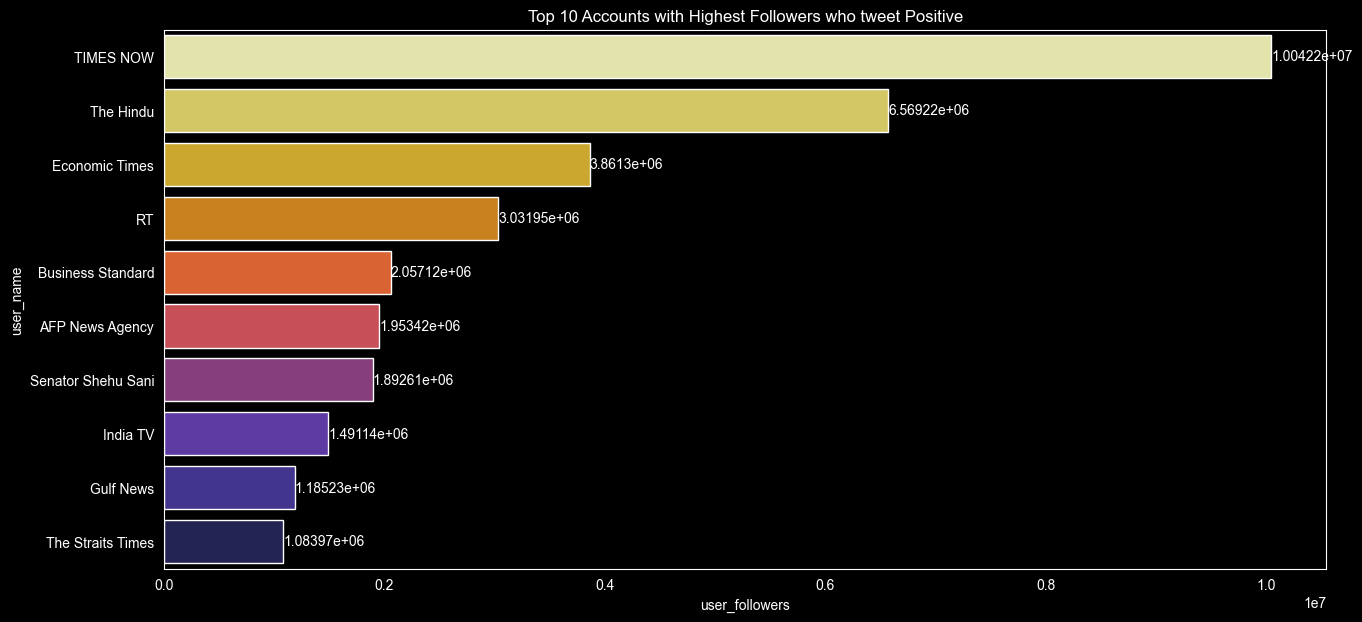

In [54]:
plt.style.use("dark_background")
plt.figure(figsize=(15, 7))
a1 = sns.barplot(x = "user_followers", y="user_name", orient="h", palette="CMRmap_r", data = data[data["sentiment"]=="Positive"].drop_duplicates(subset=["user_name"]).sort_values(by="user_followers", ascending=False)[:10])
a1.grid(False)
for container in a1.containers:
    a1.bar_label(container)
plt.title("Top 10 Accounts with Highest Followers who tweet Positive")
plt.show()

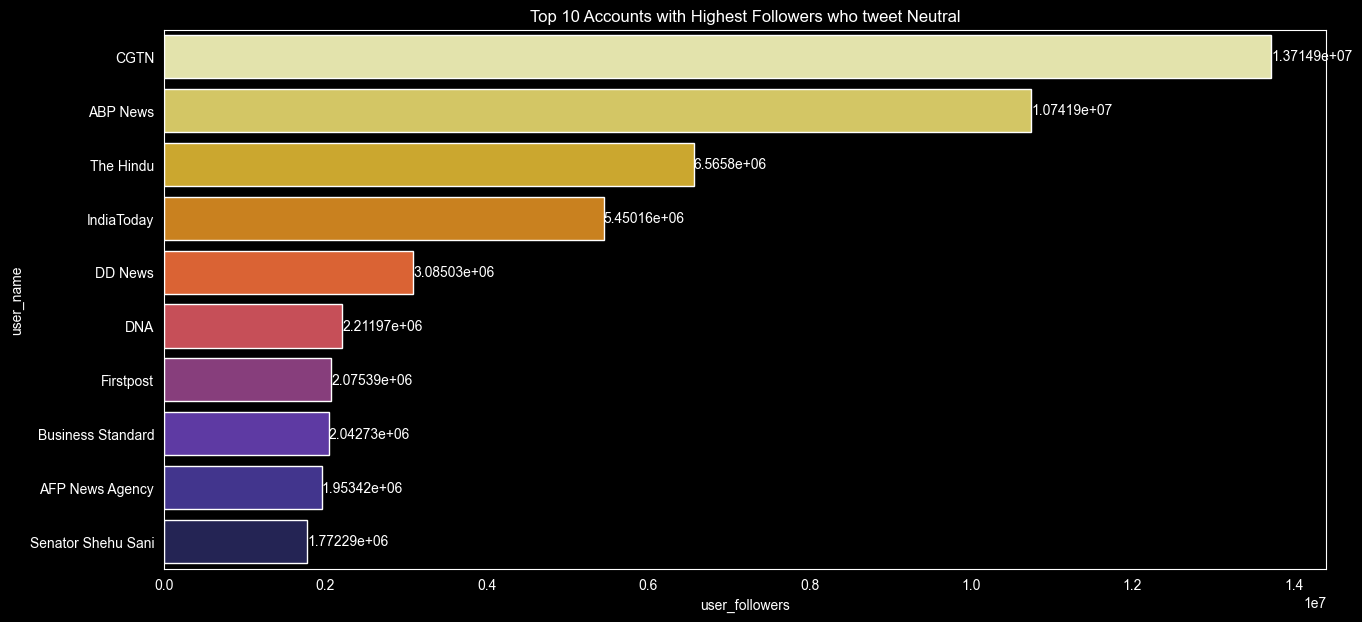

In [55]:
plt.style.use("dark_background")
plt.figure(figsize=(15, 7))
a1 = sns.barplot(x = "user_followers", y="user_name", orient="h", palette="CMRmap_r", data = data[data["sentiment"]=="Neutral"].drop_duplicates(subset=["user_name"]).sort_values(by="user_followers", ascending=False)[:10])
a1.grid(False)
for container in a1.containers:
    a1.bar_label(container)
plt.title("Top 10 Accounts with Highest Followers who tweet Neutral")
plt.show()

C:\Users\blaze\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from current font.

C:\Users\blaze\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 127486 (\N{REGIONAL INDICATOR SYMBOL LETTER Y}) missing from current font.



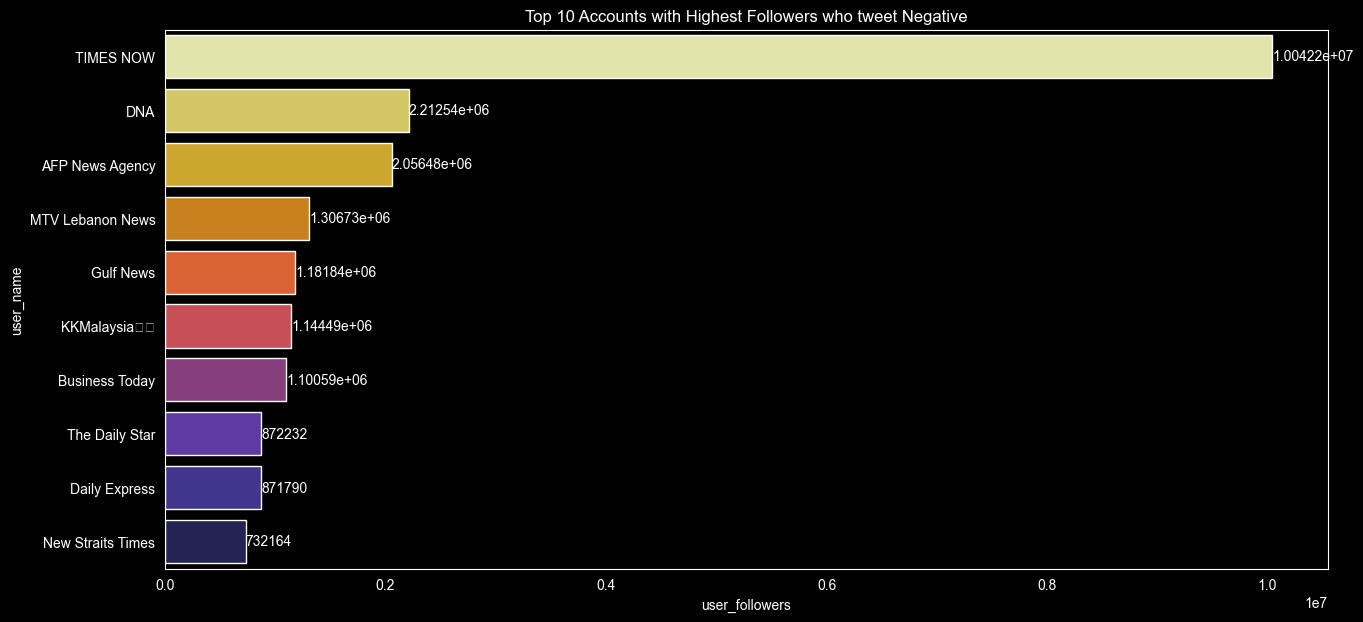

In [56]:
plt.style.use("dark_background")
plt.figure(figsize=(15, 7))
a1 = sns.barplot(x = "user_followers", y="user_name", orient="h", palette="CMRmap_r", data = data[data["sentiment"]=="Negative"].drop_duplicates(subset=["user_name"]).sort_values(by="user_followers", ascending=False)[:10])
a1.grid(False)
for container in a1.containers:
    a1.bar_label(container)
plt.title("Top 10 Accounts with Highest Followers who tweet Negative")
plt.show()

TIME BASED ANALYSIS OF TWEET SENTIMENT:

<Figure size 4000x1000 with 0 Axes>

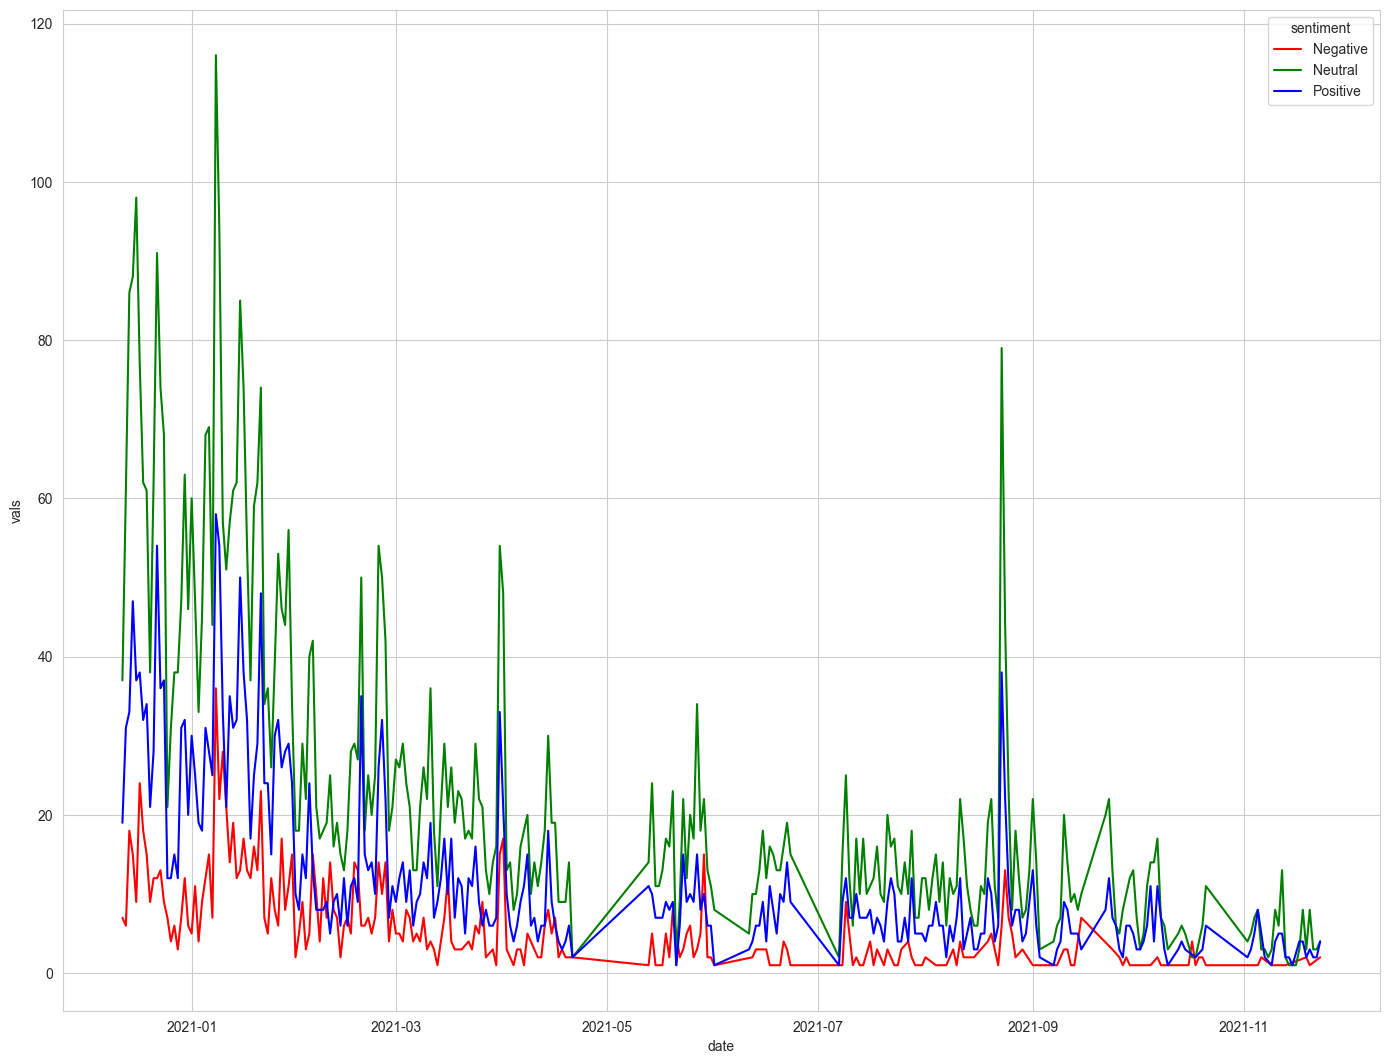

<Figure size 4000x1000 with 0 Axes>

In [57]:
data["date"] = pd.to_datetime(data.date) 
timeline = data.resample('D', on='date')["sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("date", var_name='sentiment',  value_name='vals')

sns.set_style("whitegrid")
sns.lineplot(x="date", y="vals", hue="sentiment", data=timeline, palette=["r", "g","b"])
plt.figure(figsize=(40,10))